In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('seaborn-v0_8-colorblind')
import seaborn as sn

from src.utils.ds_formatter import format_all
from src.dataset import *
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


F_DATASET = "./data/HT_Sensor_dataset_new.dat"

In [13]:
#Cojo el dataset
# Indicar en la flag si se recalcula o se usa el fichero ya hecho
df = get_dataset(build_dataset=False, time_window=5)
df.head()


,R1,R1_mean,R1_median,R1_dev,R2,R2_mean,R2_median,R2_dev,R3,R3_mean,...,R8_dev,Temp.,Temp._mean,Temp._median,Temp._dev,Humidity,Hum_mean,Hum_median,Hum_dev,class
0,12.8102,10.3665,10.4529,11.6742,13.4941,13.2749,8.30531,9.04553,26.4234,59.4725,...,9.055249,9.055620,0.005040,26.455933,26.46000,0.053836,58.967841,58.95435,0.253568,banana
1,12.8097,10.3655,10.4523,11.6734,13.4934,13.2740,8.30527,9.04545,26.4241,59.4745,...,9.055189,9.055575,0.005092,26.455474,26.45905,0.053763,58.969056,58.95435,0.255458,banana
2,12.8088,10.3645,10.4516,11.6731,13.4930,13.2730,8.30523,9.04538,26.4246,59.4763,...,9.055130,9.055535,0.005143,26.455001,26.45860,0.053666,58.970404,58.95435,0.257481,banana
3,12.8080,10.3638,10.4508,11.6727,13.4922,13.2719,8.30520,9.04516,26.4251,59.4779,...,9.055071,9.055490,0.005194,26.454513,26.45820,0.053545,58.971872,58.95435,0.259607,banana
4,12.8078,10.3628,10.4503,11.6722,13.4914,13.2708,8.30517,9.04511,26.4256,59.4793,...,9.055012,9.055460,0.005246,26.454013,26.45740,0.053402,58.973448,58.95435,0.261813,banana


Esto es considerando también humedad y tiempo

In [3]:
y = df.iloc[:,-1] #obtenemos la columna de las y
x = df.iloc[:,:-1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(10, 10,10), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train,y_train)

predict_train = mlp.predict(x_train)
predict_test = mlp.predict(x_test)

              precision    recall  f1-score   support

  background       0.96      0.99      0.97     45398
      banana       0.99      0.97      0.98     52457
        wine       0.98      0.98      0.98     72123

    accuracy                           0.98    169978
   macro avg       0.98      0.98      0.98    169978
weighted avg       0.98      0.98      0.98    169978

              precision    recall  f1-score   support

  background       0.96      0.99      0.97     22403
      banana       0.99      0.97      0.98     25982
        wine       0.98      0.98      0.98     35336

    accuracy                           0.98     83721
   macro avg       0.98      0.98      0.98     83721
weighted avg       0.98      0.98      0.98     83721



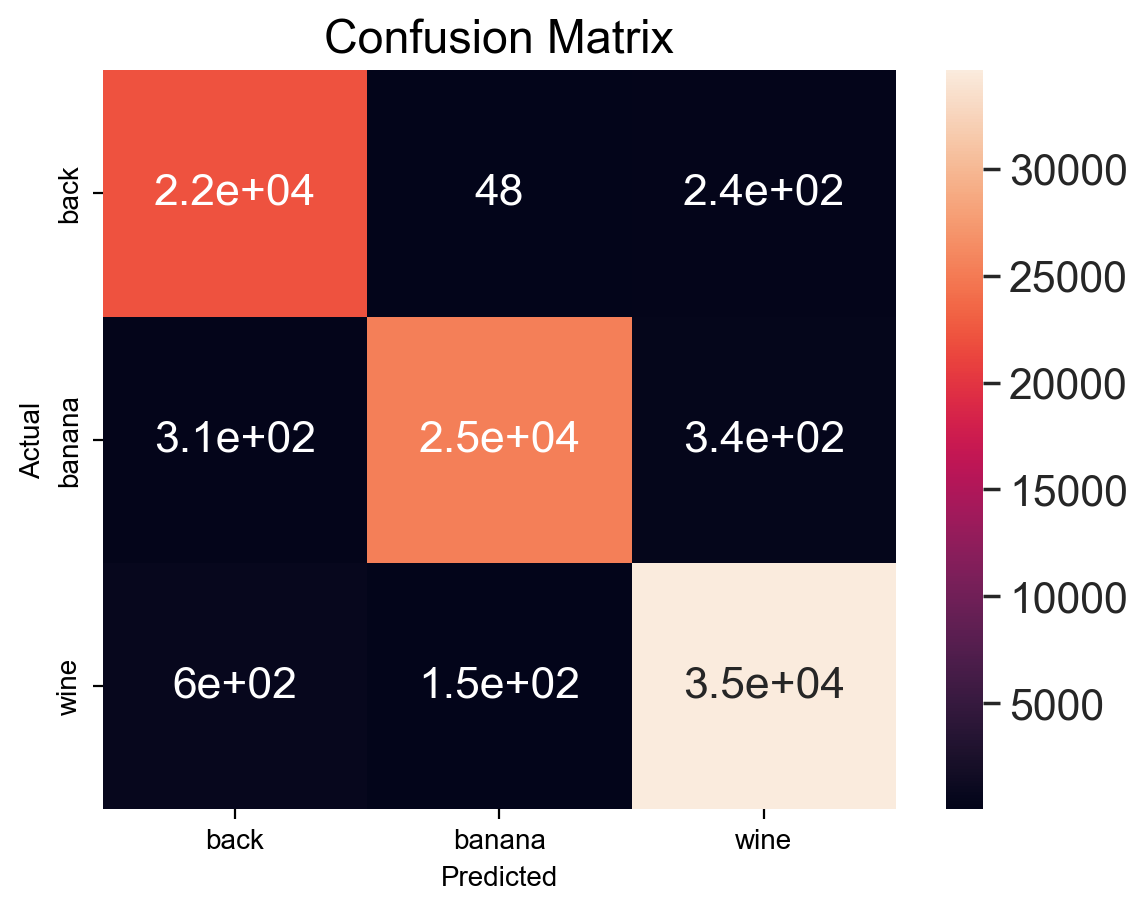

In [4]:
from sklearn.metrics import classification_report,confusion_matrix


print(classification_report(y_train, predict_train))
print(classification_report(y_test, predict_test))
class_set = np.asarray(sorted(set(y))) #las hipótesis posibles
class_set[class_set=="background"]="back"
plt.rcParams['figure.dpi'] = 200
ax = plt.subplot()
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix(y_test, predict_test), annot=True, annot_kws={"size": 16}) # font size
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.xaxis.set_ticklabels(class_set)
ax.yaxis.set_ticklabels(class_set)
plt.show()

              precision    recall  f1-score   support

  background       0.94      0.96      0.95     45398
      banana       0.99      0.96      0.97     52457
        wine       0.97      0.98      0.97     72123

    accuracy                           0.97    169978
   macro avg       0.97      0.96      0.97    169978
weighted avg       0.97      0.97      0.97    169978

              precision    recall  f1-score   support

  background       0.94      0.96      0.95     22403
      banana       0.99      0.96      0.97     25982
        wine       0.97      0.97      0.97     35336

    accuracy                           0.97     83721
   macro avg       0.97      0.97      0.97     83721
weighted avg       0.97      0.97      0.97     83721



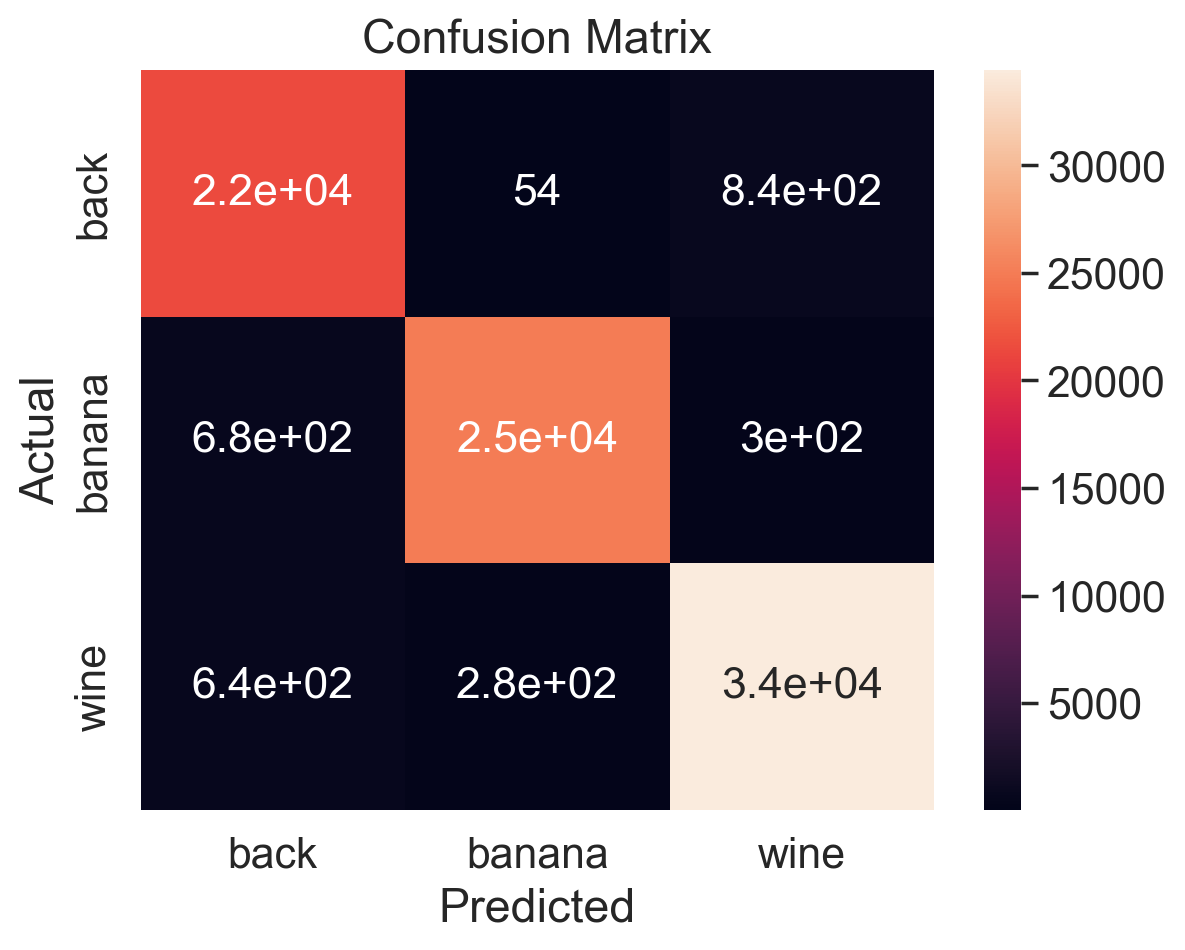

In [5]:

x_new = x[x.columns.drop(list(df.filter(regex='(Temp)|(Hum)')))]
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y, test_size=0.33, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(10, 10,10), activation='relu', solver='adam', max_iter=500)
mlp.fit(x_train_new,y_train_new)

predict_train_new = mlp.predict(x_train_new)
predict_test_new = mlp.predict(x_test_new)

print(classification_report(y_train_new, predict_train_new))
print(classification_report(y_test_new, predict_test_new))
plt.rcParams['figure.dpi'] = 200
ax = plt.subplot()
# plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(confusion_matrix(y_test_new, predict_test_new), annot=True, annot_kws={"size": 16}) # font size
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.xaxis.set_ticklabels(class_set)
ax.yaxis.set_ticklabels(class_set)
plt.show()


              precision    recall  f1-score   support

  background       0.94      0.96      0.95     22403
      banana       0.99      0.96      0.97     25982
        wine       0.97      0.97      0.97     35336

    accuracy                           0.97     83721
   macro avg       0.97      0.97      0.97     83721
weighted avg       0.97      0.97      0.97     83721

              precision    recall  f1-score   support

  background       0.96      0.99      0.97     22403
      banana       0.99      0.97      0.98     25982
        wine       0.98      0.98      0.98     35336

    accuracy                           0.98     83721
   macro avg       0.98      0.98      0.98     83721
weighted avg       0.98      0.98      0.98     83721

0.9799572389245231


<function matplotlib.pyplot.show(close=None, block=None)>

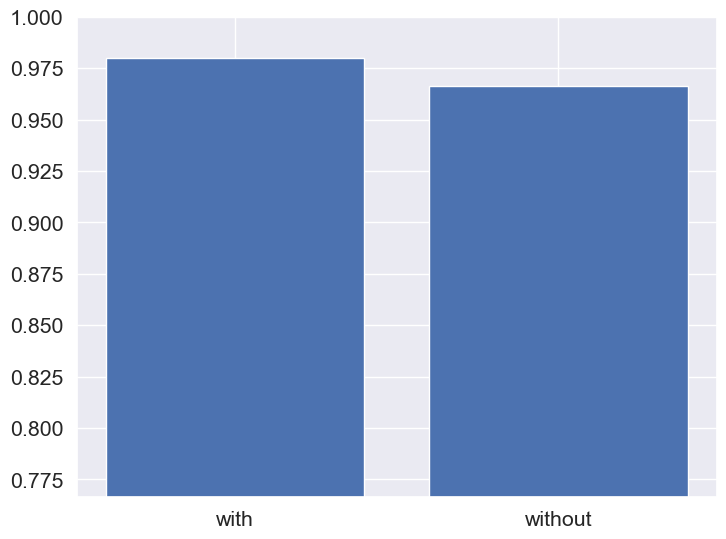

In [7]:
print(classification_report(y_test_new, predict_test_new))
print(classification_report(y_test, predict_test))
plt.rcParams['figure.dpi'] = 100
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predict_test))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ["with", "without"]
values = [accuracy_score(y_test, predict_test), accuracy_score(y_test_new, predict_test_new)]
ax.bar(langs, values)
plt.yticks(np.arange(0, 1.1, 0.025))
ax.set(ylim=[min(values)-0.2, 1])
plt.show


In [15]:
F_TEST_DATASET = "./data/filas_test.dat"

FEATURES_ORIGINAL = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'Temp.', 'Humidity']
FEATURES = [
  'R1', 'R1_mean', 'R1_median', 'R1_dev',
  'R2', 'R2_mean', 'R2_median', 'R2_dev',
  'R3', 'R3_mean', 'R3_median', 'R3_dev',
  'R4', 'R4_mean', 'R4_median', 'R4_dev',
  'R5', 'R5_mean', 'R5_median', 'R5_dev',
  'R6', 'R6_mean', 'R6_median', 'R6_dev',
  'R7', 'R7_mean', 'R7_median', 'R7_dev',
  'R8', 'R8_mean', 'R8_median', 'R8_dev',
]


dtest = pd.read_csv(F_TEST_DATASET, sep=",")
dtest['class']  = 'background'
dtest.head()

,R1,R1_mean,R1_median,R1_dev,R2,R2_mean,R2_median,R2_dev,R3,R3_mean,...,R8_dev,Temp.,Temp._mean,Temp._median,Temp._dev,Humidity,Hum_mean,Hum_median,Hum_dev,class
0,12.8617,10.3682,10.4375,11.6697,13.4927,13.3412,8.04133,8.73908,26.2308,59.0299,...,8.739010,8.739010,0.000000,26.22570,26.22570,0.000000,59.052800,59.05280,0.000000,background
1,12.8607,10.3686,10.4370,11.6696,13.4924,13.3405,8.04101,8.73915,26.2365,59.0093,...,8.739045,8.739045,0.000035,26.22825,26.22825,0.002550,59.041350,59.04135,0.011450,background
2,12.8602,10.3686,10.4370,11.6697,13.4921,13.3398,8.04086,8.73936,26.2416,58.9905,...,8.739080,8.739080,0.000057,26.23100,26.23080,0.004411,59.030667,59.02990,0.017767,background
3,12.8595,10.3688,10.4374,11.6699,13.4919,13.3390,8.04087,8.73986,26.2462,58.9736,...,8.739150,8.739115,0.000131,26.23365,26.23365,0.005972,59.020625,59.01960,0.023222,background
4,12.8594,10.3691,10.4376,11.6702,13.4921,13.3382,8.04088,8.74016,26.2503,58.9583,...,8.739292,8.739150,0.000307,26.23616,26.23650,0.007330,59.011220,59.00930,0.028022,background


In [18]:
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

def print_metrics(y_test, y_pred):
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("F1-score:",metrics.f1_score(y_test, y_pred, average='weighted'))
    plt.rcParams['figure.dpi'] = 70
    cm = metrics.confusion_matrix(y_test, y_pred)
    cmdisp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp.classes_)
    cmdisp.plot()
    plt.show()

(6972,) (6972, 32)
0    background
1    background
2    background
3    background
4    background
5    background
Name: class, dtype: object
['wine' 'wine' 'wine' 'wine' 'wine' 'wine']
Accuracy: 0.0
F1-score: 0.0


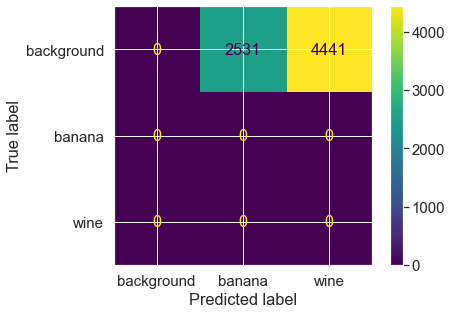

In [19]:
y_test=dtest['class']
X_test = dtest[FEATURES]
print(y_test.shape, X_test.shape)
y_pred = mlp.predict(X_test)

print(y_test[:6])
print(y_pred[:6])

print_metrics(y_test, y_pred)